# Aim: to characterize the pattern of genetic variation in the Plasmodium falciparum dihydropteroate synthase gene, in human blood samples collected from different geographical locations 

In [1]:
#Just to lightly start off the Plasmo analysis business

%time
print('Hello Plasmo World :)')

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
Hello Plasmo World :)


# Import required libraries



### We initially set up an environment (using conda) containing the packages that we might possibly need for our analyses

We then import these packages inorder to be able to work with them and their accompanying methods and attributes

In [2]:
import zarr
import allel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext rpy2.ipython 

/Users/am59/miniconda3/envs/amrwams/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/am59/miniconda3/envs/amrwams/lib/python3.6/site-packages/rpy2/ipython/rmagic.py:73: UserWarning: The Python package 'pandas' is stronglyrecommended when using `rpy2.ipython`. Unfortunately it could not be loaded, but at least we found 'numpy'.
  "but at least we found 'numpy'.")))


# File handling

For the analyses in this particular notebook, we shall use three files each with differernt kinds of information

File 1 is a multi-dimensional zarr file containing genotype data as well as information about the different variants found in the data set

File 2 is in the csv format and contains meta data about each sample that was used to generate the sequencing data

So we need to open these files as shown below and store them in memory in a format that is easy and efficient to use

In [3]:
#open zarr file

data = zarr.open('/Volumes/Team112/ra4/pf_60_public_release/Pf_60_public_wg.final.zarr', mode = 'r')
data

<zarr.hierarchy.Group '/' read-only>

In [4]:
#check the type of file- this is not so necessary at this stage
type(data)

zarr.hierarchy.Group

In [5]:
#Explore the contents of the zarr file

list(data)

['calldata', 'samples', 'variants']

In [6]:
#check column headers in the variants data to have a feel of what they represent

list(data['variants'])

['AC',
 'ALT',
 'AN',
 'CDS',
 'CHROM',
 'DP',
 'FILTER_Centromere',
 'FILTER_InternalHypervariable',
 'FILTER_Low_VQSLOD',
 'FILTER_PASS',
 'FILTER_SubtelomericHypervariable',
 'FILTER_SubtelomericRepeat',
 'ID',
 'POS',
 'QUAL',
 'REF',
 'RegionType',
 'SNPEFF_AMINO_ACID_CHANGE',
 'SNPEFF_CODON_CHANGE',
 'SNPEFF_EFFECT',
 'SNPEFF_EXON_ID',
 'SNPEFF_FUNCTIONAL_CLASS',
 'SNPEFF_GENE_NAME',
 'SNPEFF_IMPACT',
 'SNPEFF_TRANSCRIPT_ID',
 'VQSLOD',
 'is_snp',
 'numalt',
 'svlen']

In [7]:
#create 2-D chunked table of the variant data. Note that we have selectively chosen the columns to use

data_variants = allel.VariantChunkedTable(data = data['variants'], names =  ['CHROM', 
                                                                             'POS', 
                                                                             'FILTER_PASS', 
                                                                             'SNPEFF_AMINO_ACID_CHANGE',
                                                                             'SNPEFF_CODON_CHANGE',
                                                                             'SNPEFF_EFFECT',
                                                                             'SNPEFF_EXON_ID',
                                                                             'SNPEFF_FUNCTIONAL_CLASS',
                                                                             'SNPEFF_GENE_NAME',
                                                                             'SNPEFF_IMPACT',
                                                                             'is_snp',
                                                                             'numalt'])

data_variants

<VariantChunkedTable shape=(6051696,) dtype=[('CHROM', 'O'), ('POS', '<i4'), ('FILTER_PASS', '?'), ('SNPEFF_AMINO_ACID_CHANGE', 'O'), ('SNPEFF_CODON_CHANGE', 'O'), ('SNPEFF_EFFECT', 'O'), ('SNPEFF_EXON_ID', 'O'), ('SNPEFF_FUNCTIONAL_CLASS', 'O'), ('SNPEFF_GENE_NAME', 'O'), ('SNPEFF_IMPACT', 'O'), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=427.1M cbytes=54.5M cratio=7.8
   values=zarr.hierarchy.Group>

In [8]:
#Import the metadata-- saved in a text file

df_samples = pd.read_csv('/Volumes/Team112/Pf_60_candidate_public_metadata_20170919.txt', sep='\t')
df_samples

,Sample,Study,Site,Country,Population,Year,ENA,All samples same individual,% callable,Pf 6 manuscript exclusion reason
0,FP0008-C,1147-PF-MR-CONWAY,Kobeni,Mauritania,WAF,2014,ERR1081237,FP0008-C,82.16,Analysis_set
1,FP0009-C,1147-PF-MR-CONWAY,Kobeni,Mauritania,WAF,2014,ERR1081238,FP0009-C,88.85,Analysis_set
2,FP0015-C,1147-PF-MR-CONWAY,Kobeni,Mauritania,WAF,2014,ERR1081239,FP0015-C,88.45,Analysis_set
3,FP0016-C,1147-PF-MR-CONWAY,Kobeni,Mauritania,WAF,2014,ERR1081240,FP0016-C,59.83,Analysis_set
4,FP0017-C,1147-PF-MR-CONWAY,Kobeni,Mauritania,WAF,2014,ERR1081241,FP0017-C,89.02,Analysis_set
5,FP0018-C,1147-PF-MR-CONWAY,Kobeni,Mauritania,WAF,2014,ERR1081242,FP0018-C,89.05,Analysis_set
6,FP0020-C,1147-PF-MR-CONWAY,Kobeni,Mauritania,WAF,2014,ERR1081243,FP0020-C,86.88,Analysis_set
7,FP0021-C,1147-PF-MR-CONWAY,Kobeni,Mauritania,WAF,2014,ERR1081244,FP0021-C,89.70,Analysis_set
8,FP0022-C,1147-PF-MR-CONWAY,Kobeni,Mauritania,WAF,2014,ERR1081245,FP0022-C,88.61,Analysis_set
9,FP0023-C,1147-PF-MR-CONWAY,Kobeni,Mauritania,WAF,2014,ERR1081246,FP0023-C,85.46,Analysis_set


In [9]:
#You can use this function to make sure that the sample entries in either the zarr or meta data file are the same

len(df_samples)

7113

In [10]:
#Extract the genotype data for all the samples #--Note-- certain calls are missing. How do we deal with these???

genotypes = allel.GenotypeChunkedArray(data['calldata']['GT'])
genotypes

<GenotypeChunkedArray shape=(6051696, 7113, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=80.2G cbytes=10.1G cratio=7.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [11]:
#Again you can use the len function to ensure that the number of entries match 
#in either the genotype data or the variant table-- as u can see there are 7113 columns representing the
#individual samples

genotypes.shape

(6051696, 7113, 2)

# Selecting out data for the specific gene of interest

We are working with datasets spanning the entire genomes of individual samples. However, for this particular analysis, we are interested in working with only the crt gene and looking for genetic differences in this gene in multiple samples.

To do this, we generate a boolean vector with the same length as the datasets we need to query, specifying the region of interest 

In [12]:
#Obtain the gene coordinates from GeneDB. We are only interested in snp variants, that passed all filters

crt_gene = ((data_variants['CHROM'] == 'Pf3D7_08_v3') & 
            (data_variants['POS'] >= 548200) & 
            (data_variants['POS'] <= 550616) & 
            (data_variants['FILTER_PASS']) &
            (data_variants['is_snp']))

In [13]:
#Not necessary but can be useful to check the contents in the boolean vector just as a sanity measure
#As you can see, the gene contains 188 snps based on the filtering criteria chosen

print(np.unique(crt_gene, return_counts=True))

(array([False,  True]), array([6051644,      52]))


In [14]:
#In the analysis we are only interested in the samples that are the Analysis_set and that were collected from 
#Kenya and the Gambia. He we create a boolean vector that fulfils those conditions

samples = ((df_samples['Pf 6 manuscript exclusion reason'] == 'Analysis_set') & 
           (df_samples.Country.isin({'Kenya', 'Gambia'})))

In [15]:
#Again not necessary but can be useful to check the contents in the boolean vector just as a sanity measure
#As you can see, there is a total of 329 Kenya and Gambia samples

print(np.unique(samples, return_counts=True))

(array([False,  True]), array([6784,  329]))


In [16]:
#Subset the genotype data to contain only the gene of interest and samples from Kenya and Gambia

genotypes_subset = genotypes.subset(sel0 = crt_gene, sel1 = samples)
genotypes_subset

<GenotypeChunkedArray shape=(52, 329, 2) dtype=int8 chunks=(52, 329, 2)
   nbytes=33.4K cbytes=1.5K cratio=22.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [17]:
#Select the Kenya and Gambia meta data
#note the difference in the use of the boolean vector as well as how the table has been re-indexed

samples_subset = df_samples[samples]
samples_subset.reset_index(drop=True, inplace=True)
samples_subset.head()

,Sample,Study,Site,Country,Population,Year,ENA,All samples same individual,% callable,Pf 6 manuscript exclusion reason
0,PA0007-C,1006-PF-GM-CONWAY,Brikama,Gambia,WAF,2008,ERR018933,PA0007-C,77.37,Analysis_set
1,PA0008-C,1006-PF-GM-CONWAY,Brikama,Gambia,WAF,2008,ERR018936,PA0008-C,89.37,Analysis_set
2,PA0011-C,1006-PF-GM-CONWAY,Brikama,Gambia,WAF,2008,ERR015410,PA0011-C,89.55,Analysis_set
3,PA0012-C,1006-PF-GM-CONWAY,Brikama,Gambia,WAF,2008,ERR021977,PA0012-C,88.55,Analysis_set
4,PA0013-C,1006-PF-GM-CONWAY,Brikama,Gambia,WAF,2008,ERR211480,PA0013-C,89.71,Analysis_set


In [18]:
#just to double-check that we have 329 samples

len(samples_subset)

329

In [19]:
#You could also makea count of the samples from each of the two populations

samples_subset['Country'].value_counts()

Gambia    219
Kenya     110
Name: Country, dtype: int64

# Start-up population genetics

For a start, we want to have an idea of the distribution of alleles in the selected populations and kind of genotypes
ie. biallelic, monoallelic present in the data.
Also, this is the data we shall use for the actual population structure and cluster analyses

In [20]:
#Write a dictionary containing the population labels as keys each with its own unique sample indices
#We need this to be able to generate allele counts

subpops = {
            'all'   :list(range(len(samples_subset))),
            'Kenya' :samples_subset.Country[samples_subset.Country == 'Kenya'].index,
            'Gambia':samples_subset.Country[samples_subset.Country == 'Gambia'].index
          }

In [21]:
#check values of one of the keys

subpops['Kenya']

Int64Index([219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
            ...
            319, 320, 321, 322, 323, 324, 325, 326, 327, 328],
           dtype='int64', length=110)

In [22]:
# generate the reference and alternate allele counts for each of the populations. Note the biallelic nature of the snps. 
#The latter might not necessarily always be the case

acs = genotypes_subset.count_alleles_subpops(subpops)
acs

<AlleleCountsChunkedTable shape=(52,) dtype=[('Gambia', '<i4', (4,)), ('Kenya', '<i4', (4,)), ('all', '<i4', (4,))]
   nbytes=2.4K cbytes=1.5K cratio=1.6
   values=allel.chunked.storage_zarr.ZarrTable>

In [23]:
#You could explore the reference and alternate allele counts for the individual pops.
#Note 0= reference allele, and 1 =alternate allele
#Therefore as an example, for snp 1 (at row 0), there are 220 reference alleles and 0 alternarnate alleles
#in the Kenyan population

cv = (acs['Kenya'][:])
cv

<AlleleCountsArray shape=(52, 4) dtype=int32>
216   0   0   0
220   0   0   0
220   0   0   0
...
220   0   0   0
220   0   0   0
220   0   0   0

In [24]:
#We can count the number of non-segregating alleles in the Kenyan population

cv.count_non_segregating()

46

In [25]:
#Count the number of segregating alleles in the Kenyan population

cv.count_segregating()

6

In [26]:
#Count the number of singletons alleles in the Kenyan population

cv.count_singleton()

1

#You could do the same for the Gambia data

# Filtering the snps

Normally snps could be monoallelic, biallelic, multiallelic or even missing. 
For our analysis, we need to use bi-allelic snps that are segregating in the union of the two populations
The segregating snps give us better resolution in identifying population clusters whereas, 
It is easier working with bi-allelic snps

#How would we deal with missing data?

In [27]:
#`Generate a boolean array to allow the extraction of only biallelic snps

fr = cv.is_biallelic()

#Print the contents of this vector.
#Note- as you can see from the results, 166 samples are not biallelic whereas 22 are biallelic 

print(np.unique(fr, return_counts=True))

(array([False,  True]), array([47,  5]))


In [28]:
#Extract out the biallelic snps for Kenya
#As you can see, there are only 22 biallelic snps in the samples from the Kenyan population

cv.compress(cv.is_biallelic())

,0,1,2,3
0,212,8,0,0
1,196,0,0,24
2,204,16,0,0
3,16,204,0,0
4,219,1,0,0


In [29]:
#A different way of setting the filters.
#Note the similarity in the results

s = cv.compress((cv.max_allele() == 1) & (cv.is_segregating()))
s

,0,1,2,3
0,212,8,0,0
1,204,16,0,0
2,16,204,0,0
3,219,1,0,0


In [30]:
#Do as explained in the Kenyan example

cv2 = (acs['Gambia'][:])
cv2

<AlleleCountsArray shape=(52, 4) dtype=int32>
438   0   0   0
438   0   0   0
438   0   0   0
...
438   0   0   0
438   0   0   0
438   0   0   0

In [31]:
#count the total number of reference and alterbnate alleles in the Gambian population before applying the filter 
#In this case, there are 79339 reference alleles and 1901 alternate alleles

np.sum(cv2, axis=0)

array([22262,   505,     7,     0])

In [32]:
#Do as explained in the Kenyan example
#As you can see, there are a total of 17 biallelic snps in the Gambian population

sr = cv2.compress((cv2.max_allele() == 1) & (cv2.is_segregating()))
sr

<AlleleCountsArray shape=(10, 4) dtype=int32>
426  12   0   0
202 236   0   0
436   2   0   0
...
434   4   0   0
435   3   0   0
437   1   0   0

In [33]:
#count the number of reference and alterbnate alleles in the Gambian population after applying the filter
#In this case, there are 5493 reference alleles and 1901 alternate alleles
#Note that the alternate counts did not change. Why?

np.sum(sr, axis=0)

array([3875,  505,    0,    0])

# NOTE

Extracting snps using the methods above would result in loss of snps for either the reference or
alternate alleles that are fixed in either of the populations,
and not present one of the two populations.

As such, we instead  need to generate a variable with the concatenated columns and use this to identify 
segregating snps

In [34]:
#Cocatenate the corresponding reference and alternate allele counts columns of Kenya and Gambia 
#Populations

addt = allel.AlleleCountsArray(cv + cv2)
addt

<AlleleCountsArray shape=(52, 4) dtype=int32>
654   0   0   0
658   0   0   0
658   0   0   0
...
658   0   0   0
658   0   0   0
658   0   0   0

In [35]:
#Generate a boolean filter for biallelic snps

flt = (addt.is_segregating() & (addt.max_allele() == 1))
flt

array([False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False])

In [36]:
#Could use the len function to mantain levels of sanity

len(flt)

52

In [37]:
#Extract snps in the Kenyan populations
#if you put index list outside, u get a less neat array

cd1 = allel.AlleleCountsArray(cv.compress((flt), axis = 0)[:, :2]) 
cd1

<AlleleCountsArray shape=(10, 2) dtype=int32>
220   0
212   8
220   0
...
219   1
220   0
220   0

In [38]:
#Extract snps in the Gambian populations
#if u put index list outside, u get a less neat array # also include allel.AlleleCountsArray
cd2 = allel.AlleleCountsArray(cv2.compress((flt), axis = 0)[:, :2]) 
cd2

<AlleleCountsArray shape=(10, 2) dtype=int32>
426  12
202 236
436   2
...
438   0
435   3
437   1

In [39]:
#Check the contents of the gene filter
#Note the headings 

crt_gene

<ChunkedArrayWrapper shape=(6051696,) dtype=bool chunks=(378231,)
   nbytes=5.8M cbytes=25.5K cratio=231.7
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [40]:
#To be able to use the gene filter on the variants chuncked table,
#We need to remove the headers and remain with only the array

ct = crt_gene[:]
ct

array([False, False, False, ..., False, False, False])

In [41]:
#Filter the variants chunked table based on the three filters described above

po = (data_variants[:].values).compress(ct)
bm = po.compress(flt)
bm

rec.array([('Pf3D7_08_v3', 548505,  True, '', '', 'INTRON', '1', 'NONE', 'PPPK-DHPS', 'MODIFIER',  True, 1),
           ('Pf3D7_08_v3', 548801,  True, 'K142', 'aaG/aaA', 'SYNONYMOUS_CODING', '2', 'SILENT', 'PPPK-DHPS', 'LOW',  True, 1),
           ('Pf3D7_08_v3', 549213,  True, 'D280N', 'Gat/Aat', 'NON_SYNONYMOUS_CODING', '2', 'MISSENSE', 'PPPK-DHPS', 'MODERATE',  True, 1),
           ('Pf3D7_08_v3', 549446,  True, 'V357', 'gtG/gtT', 'SYNONYMOUS_CODING', '2', 'SILENT', 'PPPK-DHPS', 'LOW',  True, 1),
           ('Pf3D7_08_v3', 549685,  True, 'G437A', 'gGt/gCt', 'NON_SYNONYMOUS_CODING', '2', 'MISSENSE', 'PPPK-DHPS', 'MODERATE',  True, 1),
           ('Pf3D7_08_v3', 549698,  True, 'I441M', 'atA/atG', 'NON_SYNONYMOUS_CODING', '2', 'MISSENSE', 'PPPK-DHPS', 'MODERATE',  True, 1),
           ('Pf3D7_08_v3', 549993,  True, 'K540*', 'Aaa/Taa', 'STOP_GAINED', '2', 'NONSENSE', 'PPPK-DHPS', 'HIGH',  True, 2),
           ('Pf3D7_08_v3', 550117,  True, 'A581G', 'gCg/gGg', 'NON_SYNONYMOUS_CODING', '2

In [42]:
#Generate a boolean vector to extract information about whether a variant is located 
#within either coding or non-coding regions

l = bm['SNPEFF_EFFECT'] == 'INTRON'
r = bm['SNPEFF_EFFECT'] == 'NON_SYNONYMOUS_CODING'
u = bm['SNPEFF_EFFECT'] == 'SYNONYMOUS_CODING'

In [43]:
#Check contents of one of the boolean vector 

l

array([ True, False, False, False, False, False, False, False, False,
       False])

# Plotting FST

We define a function to plot the FST for each snp between the Kenya and Gambia populations. The aim is to identify snps that are probably significantly differentiated in the two populations

In [44]:
#Define Fst plotting function


def plot_fst( ac1, ac2, pos,l, r, u, blen=1):
    fst, se, vb, _ = allel.stats.blockwise_hudson_fst(ac1, ac2, blen =blen)
    #fst, se, vb, _ = allel.stats.blockwise_hudson_fst(ac1, ac2, blen=blen)
    
    print('Global Fst :', round(fst, 2))

    print('Standard error :', round(se, 2))
    
    y = vb
    
    #print(y)
      
    x = allel.stats.moving_statistic(pos, statistic=lambda v: (v[0] + v[-1])/2, size=blen)
    
    group1 = (y.compress(l), x.compress(l))
    group2 = (y.compress(r), x.compress(r))
    group3 = (y.compress(u), x.compress(u))
    
    #print(group1)
    
    data = (group1, group2, group3)
    
    col= ('red', 'blue', 'green')
    
    labels = ('INTRON', 'NON_SYNONYMOUS_CODING', 'SYNONYMOUS_CODING')
  
    
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.despine(ax=ax, offset=10)
    
    for fu, mh, hm in zip (data, col, labels):
        y, x = fu
        ax.scatter(x, y, c = mh, label = hm, s = 80)
    
    ax.set_ylabel('$F_{ST}$')
    ax.set_xlabel('Chloroquine Resistance Transporter gene'  )
    ax.set_xlim(548000, 551000)
    ax.set_ylim(0, 1.0)
    plt.legend()
    plt.show()
    

Global Fst : 0.62
Standard error : 0.29


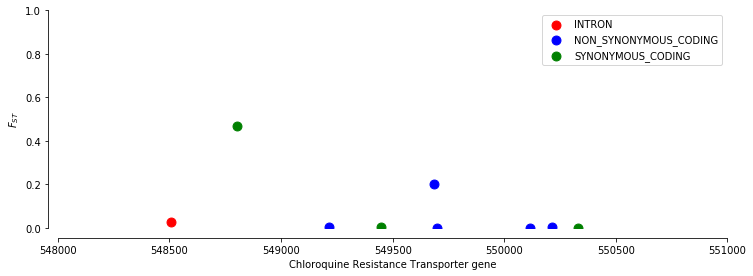

In [45]:
#Run the actual plot

plot_fst( cd1, cd2, bm['POS'], l, r, u)

Results generally show that the average Fst based on the snp data between these two populations is 0.34 which is relatively high. Also, there is a large proportion of highly differentiated non-synonymous snps, which could potentially suggest that these regions are under positive or negative selection (depending the population you analyze the results from).

However more confirmatory analyses would be needed

# PCA Analysis

Normally, we want to see if there is any population structure in the distribution of genetic variation across the geographical as has been shown by the FST plot above. To do this, we can use non model methods such as PCA

In [46]:
#For a start, we filter the genotype data to obain a dateaset with snps and samples matching our filtering 
#criteria

genot = genotypes_subset.subset(sel0 = flt)
genot

<GenotypeChunkedArray shape=(10, 329, 2) dtype=int8 chunks=(10, 329, 2)
   nbytes=6.4K cbytes=1.1K cratio=6.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [47]:
#We the then generate a 2-D table of the aternate alleles counts for each snp per sample
#Note they should be either 0, 1, or 2

genot_pca = genot.to_n_alt()[:]

genot_pca

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [48]:
#Run the PCA

coords, model = allel.pca(genot_pca, n_components=10, scaler='patterson')

In [49]:
#Define a fuction for plotting the pca's

def plot_pca_coords(coords, model, pc1, pc2, ax):
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in ['Kenya', 'Gambia']:
        flt = (samples_subset.Country == pop).values
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', label=pop, markersize=6)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))

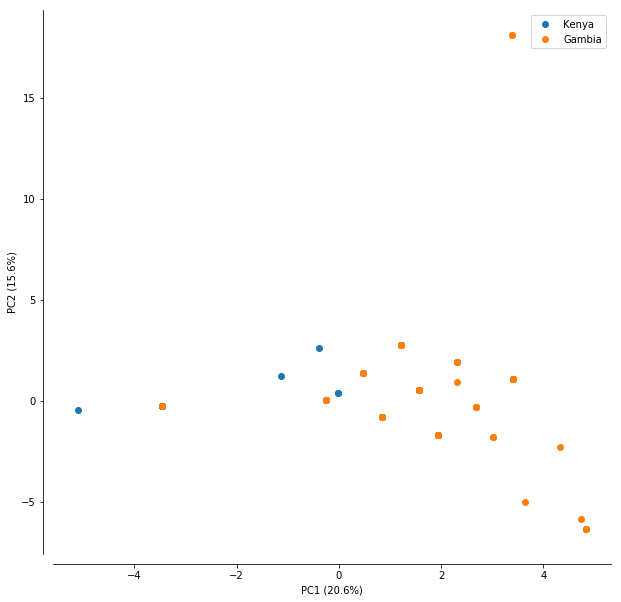

In [50]:
#Run the actual plots

fig, ax = plt.subplots(figsize=(10, 10))
sns.despine(ax=ax, offset=10)
plot_pca_coords(coords, model, 0, 1, ax)
ax.legend();

Generally the results show no structure as would probably be expected given the few snps used and the non-randomness of the snps

In [51]:
##Consistency in PCA plots?? Investigate

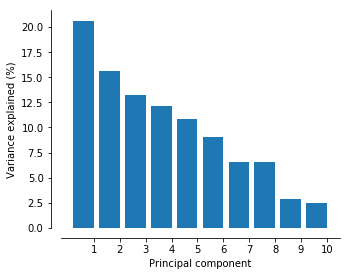

In [52]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.despine(ax=ax, offset=10)
y = 100 * model.explained_variance_ratio_
x = np.arange(len(y))
ax.set_xticks(x + .4)
ax.set_xticklabels(x + 1)
ax.bar(x, y)
ax.set_xlabel('Principal component')
ax.set_ylabel('Variance explained (%)');

In summary the the first two principal components explain for about 17% of the total variation in the data and hence the pca plot above is probably not a true reflection of the underlying structure

# Linkage Disequilibrium analysis and  PRUNING

Normally to run pca or other population genetic models, it is best to use snps that are independent of each other and not in linkage disequilibrium. We can filter out the snps in high LD as shown below

In [53]:
#Define a function to calculate the pairwise LD as well as make the plot

def plot_ld(gn, title):
    m = allel.stats.rogers_huff_r(gn) ** 2
    
    #print(m)
    gh = pd.DataFrame(m)
    #print(gh)
    #print(m.shape)
    
    ax = allel.plot.pairwise_ld(m)
    ax.set_title(title)

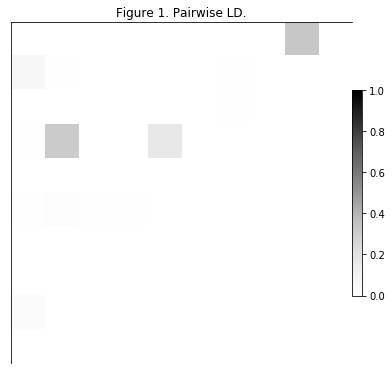

In [54]:
#Run the plot of pairwise LD

plot_ld(genot_pca, 'Figure 1. Pairwise LD.')

LD ranges from 0 to 1. The dark spots show pairwise snp comparisons that are in high LD with each other. We can filter or prune these out by defining a threshold LD we want-- see below

In [55]:
#Define the pruning function

def ld_prune(gn, size, step, threshold=.1, n_iter=1):
    for i in range(n_iter):
        loc_unlinked = allel.locate_unlinked(gn, size=size, step=step, threshold=threshold)
        n = np.count_nonzero(loc_unlinked)
        n_remove = gn.shape[0] - n
        print('iteration', i+1, 'retaining', n, 'removing', n_remove, 'variants')
        gn = gn.compress(loc_unlinked, axis=0)
    return gn

In [56]:
#Run the actual prunning

gnu = ld_prune(genot_pca, size=10, step=5, threshold=.1, n_iter=5)

iteration 1 retaining 8 removing 2 variants
iteration 2 retaining 8 removing 0 variants
iteration 3 retaining 8 removing 0 variants
iteration 4 retaining 8 removing 0 variants
iteration 5 retaining 8 removing 0 variants


As you can see, a total of 6 snps have been removed. NOTE that after the second iteration no snps are filtered out.

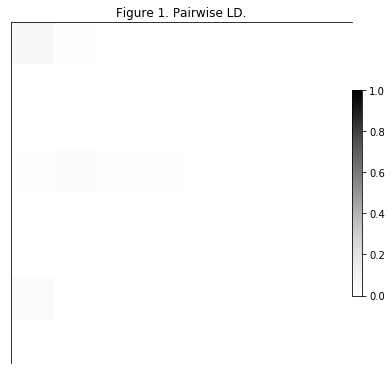

In [57]:
plot_ld(gnu, 'Figure 1. Pairwise LD.')

As you can see, the plot is cleaner, with probably no snps in LD. Lets try to draw a pca plot to see if there are any differences 

In [58]:
#Run the PCA again

coords2, model2 = allel.pca(gnu, n_components=10, scaler='patterson')

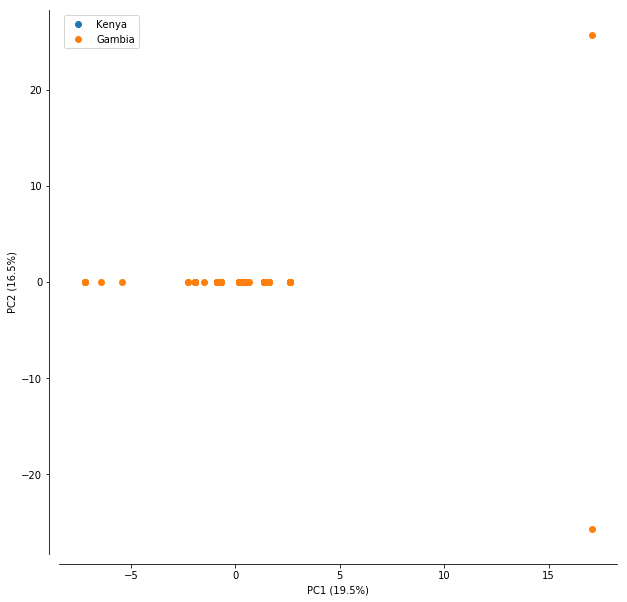

In [59]:
#run the actual plot again

def plot_pca_coords(coords2, model2, pc1, pc2, ax2):
    x = coords2[:, pc1]
    y = coords2[:, pc2]
    for pop in ['Kenya', 'Gambia']:
        flt = (samples_subset.Country == pop).values
        ax2.plot(x[flt], y[flt], marker='o', linestyle=' ', label=pop, markersize=6)
    ax2.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model2.explained_variance_ratio_[pc1]*100))
    ax2.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model2.explained_variance_ratio_[pc2]*100))

fig2, ax2 = plt.subplots(figsize=(10, 10))
sns.despine(ax=ax2, offset=10)
plot_pca_coords(coords2, model2, 0, 1, ax2)
ax2.legend();

Generally, as you can see there is no difference in the pca plots

# Haplotype Clustering

Generate haplotpe clusters based on euclidean distances to see if there are any distinct haplotypes in the dataset, and whether these structure in concordance with geography

In [60]:
#Transpose the data

uj = genot_pca.transpose()
uj

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [61]:
#Generate a dataframe

btt =pd.DataFrame(uj)
btt

,0,1,2,3,4,5,6,7,8,9
0,0,2,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0
5,0,0,0,0,2,0,0,0,0,0
6,0,2,0,0,0,0,0,0,0,0
7,0,0,0,0,2,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [62]:
#Examine the labelling in the data

bz = samples_subset.Country
bz[:]

0      Gambia
1      Gambia
2      Gambia
3      Gambia
4      Gambia
5      Gambia
6      Gambia
7      Gambia
8      Gambia
9      Gambia
10     Gambia
11     Gambia
12     Gambia
13     Gambia
14     Gambia
15     Gambia
16     Gambia
17     Gambia
18     Gambia
19     Gambia
20     Gambia
21     Gambia
22     Gambia
23     Gambia
24     Gambia
25     Gambia
26     Gambia
27     Gambia
28     Gambia
29     Gambia
        ...  
299     Kenya
300     Kenya
301     Kenya
302     Kenya
303     Kenya
304     Kenya
305     Kenya
306     Kenya
307     Kenya
308     Kenya
309     Kenya
310     Kenya
311     Kenya
312     Kenya
313     Kenya
314     Kenya
315     Kenya
316     Kenya
317     Kenya
318     Kenya
319     Kenya
320     Kenya
321     Kenya
322     Kenya
323     Kenya
324     Kenya
325     Kenya
326     Kenya
327     Kenya
328     Kenya
Name: Country, Length: 329, dtype: object

In [63]:
#Convert the labels into a pandas dataframe

bk = pd.DataFrame(bz)
bk

,Country
0,Gambia
1,Gambia
2,Gambia
3,Gambia
4,Gambia
5,Gambia
6,Gambia
7,Gambia
8,Gambia
9,Gambia


In [64]:
#Add the two dataframes

jd = btt.join(bk)
jd

,0,1,2,3,4,5,6,7,8,9,Country
0,0,2,0,0,0,0,0,0,0,0,Gambia
1,0,1,0,0,1,1,0,0,0,0,Gambia
2,0,0,0,0,0,0,0,0,0,0,Gambia
3,0,0,0,0,2,0,0,0,0,0,Gambia
4,0,2,0,0,0,0,0,0,0,0,Gambia
5,0,0,0,0,2,0,0,0,0,0,Gambia
6,0,2,0,0,0,0,0,0,0,0,Gambia
7,0,0,0,0,2,0,0,0,0,0,Gambia
8,0,0,0,0,0,0,0,0,0,0,Gambia
9,0,0,0,0,0,0,0,0,0,0,Gambia


In [65]:
country = jd.pop("Country")
country

0      Gambia
1      Gambia
2      Gambia
3      Gambia
4      Gambia
5      Gambia
6      Gambia
7      Gambia
8      Gambia
9      Gambia
10     Gambia
11     Gambia
12     Gambia
13     Gambia
14     Gambia
15     Gambia
16     Gambia
17     Gambia
18     Gambia
19     Gambia
20     Gambia
21     Gambia
22     Gambia
23     Gambia
24     Gambia
25     Gambia
26     Gambia
27     Gambia
28     Gambia
29     Gambia
        ...  
299     Kenya
300     Kenya
301     Kenya
302     Kenya
303     Kenya
304     Kenya
305     Kenya
306     Kenya
307     Kenya
308     Kenya
309     Kenya
310     Kenya
311     Kenya
312     Kenya
313     Kenya
314     Kenya
315     Kenya
316     Kenya
317     Kenya
318     Kenya
319     Kenya
320     Kenya
321     Kenya
322     Kenya
323     Kenya
324     Kenya
325     Kenya
326     Kenya
327     Kenya
328     Kenya
Name: Country, Length: 329, dtype: object

In [66]:
#Create a dictionary

lut = dict(zip(country.unique(), "rk"))
lut

{'Gambia': 'r', 'Kenya': 'k'}

In [67]:
#Create a re-label of the country codes

row_colors = country.map(lut)
row_colors

0      r
1      r
2      r
3      r
4      r
5      r
6      r
7      r
8      r
9      r
10     r
11     r
12     r
13     r
14     r
15     r
16     r
17     r
18     r
19     r
20     r
21     r
22     r
23     r
24     r
25     r
26     r
27     r
28     r
29     r
      ..
299    k
300    k
301    k
302    k
303    k
304    k
305    k
306    k
307    k
308    k
309    k
310    k
311    k
312    k
313    k
314    k
315    k
316    k
317    k
318    k
319    k
320    k
321    k
322    k
323    k
324    k
325    k
326    k
327    k
328    k
Name: Country, Length: 329, dtype: object

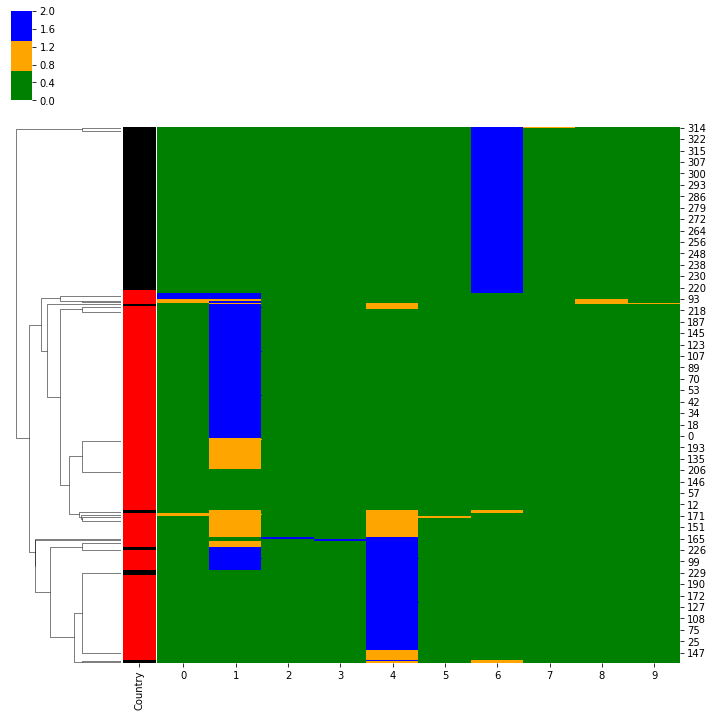

In [68]:
#Run the haplotype cluster function

sns.clustermap(jd, col_cluster=False, cmap=["green", "orange", "Blue"], figsize=(12, 12), row_colors=row_colors);

Note: red is for Gambia, and Black is Kenyan samples. As you can see there appears to be distinct haplotypes in concordance with geography